In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

## Global parameters

In [2]:
# Transparency of Histograms
transp=0.6

## Import data:
Using ShowJetsData_full.npz to build the CNN.

In [3]:
data= np.load('data/ShowJetsData_full.npz')

In [4]:
data_dic={key : data[key]  for key in data.keys()}
n_data=len(data_dic['labels'])
# Sum all signal labels
data_dic['labels']=np.array([[ele[0],np.sum(ele[1:])] for ele in data_dic['labels']]).astype(int)

In [ ]:
# Add Absolute value of jet pull

In [33]:
data_dic['Abs_jetpull']=np.absolute(data_dic['jetpull'])

In [34]:
# Save picture dimensions
grid=len(data_dic['jetImages'][0])

## Balance and Normalize data and split into train and test

Build list of signal and background indices, balance them, shuffle, split to train and test and combine back.

In [35]:
split=0.9

In [36]:
np.random.seed(1)
# split signal and background indices
ind_sig_inb=np.argwhere(data_dic['labels'][:,1]==1)[:,0]
ind_bkg=np.argwhere(data_dic['labels'][:,0]==1)[:,0]
# balance data such that we have equal numbers of signal vs background
ind_sig=np.random.choice(ind_sig_inb,len(ind_bkg))
# shuffle indices randomly
np.random.shuffle(ind_bkg)
np.random.shuffle(ind_sig)
# split into train and test indices
cut=int(split*len(ind_bkg))
ind_train=np.concatenate((ind_bkg[:cut],ind_sig[:cut]),axis=0)
ind_test=np.concatenate((ind_bkg[cut:],ind_sig[cut:]),axis=0)

In [37]:
print(len(ind_bkg))
print(len(ind_sig))

496341
496341


Build two dictionaries with train and test data.

In [38]:
data_train={}
data_test={}
for key in data_dic.keys():
    sub_train=data_dic[key][ind_train]
    sub_test=data_dic[key][ind_test]
    if key=='jetImages':
        minn=np.min(np.concatenate((sub_train,sub_test),axis=0))
        maxx=np.max(np.concatenate((sub_train,sub_test),axis=0))
        data_train[key]=(sub_train-minn)/(maxx-minn)
        data_test[key]=(sub_test-minn)/(maxx-minn)
    else:
        minn=np.min(np.concatenate((sub_train,sub_test),axis=0),axis=0)
        maxx=np.max(np.concatenate((sub_train,sub_test),axis=0),axis=0)
        data_train[key]=(sub_train-minn)/(maxx-minn)
        data_test[key]=(sub_test-minn)/(maxx-minn)

In [39]:
n_train=len(data_train['jetPt'])
print(n_train)
n_test=len(data_test['jetPt'])
print(n_test)

893412
99270


## Correlation Matrix

In [52]:
feat_all=[feat for feat in data_train.keys()]
feat_all.remove('jetImages')
feat_all.remove('labels')

In [54]:
df_train=pd.DataFrame(data_train,columns=feat_all)
df_test=pd.DataFrame(data_test,columns=feat_all)

In [55]:
corrMat_train = df_train.corr()
corrMat_test = df_test.corr()

In [56]:
corrMat_train

,jetPt,jetEta,jetPhi,tau21,chMult,neutMult,phoMult,eleMult,muMult,jetpull,Abs_jetpull
jetPt,1.000000,-0.000315,0.000424,-0.272070,0.244726,0.083034,0.360154,0.094344,0.065965,0.001271,-0.072922
jetEta,-0.000315,1.000000,-0.000119,0.001381,0.001300,0.000461,0.000673,0.000500,0.001587,-0.000878,0.001110
jetPhi,0.000424,-0.000119,1.000000,-0.001837,0.001249,-0.000585,0.000980,-0.000694,0.000875,0.000615,-0.000898
tau21,-0.272070,0.001381,-0.001837,1.000000,-0.071280,-0.003674,-0.119154,-0.070409,-0.093616,-0.000633,0.221334
chMult,0.244726,0.001300,0.001249,-0.071280,1.000000,0.341949,0.610761,0.097395,0.058689,-0.000302,-0.002654
neutMult,0.083034,0.000461,-0.000585,-0.003674,0.341949,1.000000,0.248898,0.030747,0.011276,0.000546,0.008398
phoMult,0.360154,0.000673,0.000980,-0.119154,0.610761,0.248898,1.000000,0.114634,0.045514,0.000097,-0.022895
eleMult,0.094344,0.000500,-0.000694,-0.070409,0.097395,0.030747,0.114634,1.000000,0.071118,-0.000456,-0.014639
muMult,0.065965,0.001587,0.000875,-0.093616,0.058689,0.011276,0.045514,0.071118,1.000000,0.001599,-0.016526
jetpull,0.001271,-0.000878,0.000615,-0.000633,-0.000302,0.000546,0.000097,-0.000456,0.001599,1.000000,0.001571


In [57]:
corrMat_test

,jetPt,jetEta,jetPhi,tau21,chMult,neutMult,phoMult,eleMult,muMult,jetpull,Abs_jetpull
jetPt,1.000000,-0.004820,-0.002523,-0.270767,0.247056,0.080084,0.364176,0.095948,0.065246,-0.003098,-0.077215
jetEta,-0.004820,1.000000,0.000245,0.005831,-0.003487,0.004933,-0.001782,-0.001591,0.002213,-0.000612,0.001638
jetPhi,-0.002523,0.000245,1.000000,-0.003357,-0.002379,-0.001154,-0.004319,-0.000267,0.000834,0.003322,0.000582
tau21,-0.270767,0.005831,-0.003357,1.000000,-0.070568,-0.000048,-0.121717,-0.069857,-0.090768,0.000991,0.217161
chMult,0.247056,-0.003487,-0.002379,-0.070568,1.000000,0.340448,0.618292,0.101123,0.061043,0.000721,-0.003927
neutMult,0.080084,0.004933,-0.001154,-0.000048,0.340448,1.000000,0.246401,0.028196,0.009314,0.000285,0.014087
phoMult,0.364176,-0.001782,-0.004319,-0.121717,0.618292,0.246401,1.000000,0.114505,0.047869,-0.003374,-0.026794
eleMult,0.095948,-0.001591,-0.000267,-0.069857,0.101123,0.028196,0.114505,1.000000,0.072783,0.000197,-0.018216
muMult,0.065246,0.002213,0.000834,-0.090768,0.061043,0.009314,0.047869,0.072783,1.000000,0.006534,-0.011460
jetpull,-0.003098,-0.000612,0.003322,0.000991,0.000721,0.000285,-0.003374,0.000197,0.006534,1.000000,-0.001570


## Plot Data

In [58]:
ind_train_sig=np.argwhere(data_train['labels'][:,1]==1)[:,0]
ind_train_bkg=np.argwhere(data_train['labels'][:,0]==1)[:,0]
ind_test_sig=np.argwhere(data_test['labels'][:,1]==1)[:,0]
ind_test_bkg=np.argwhere(data_test['labels'][:,0]==1)[:,0]

### JetImages

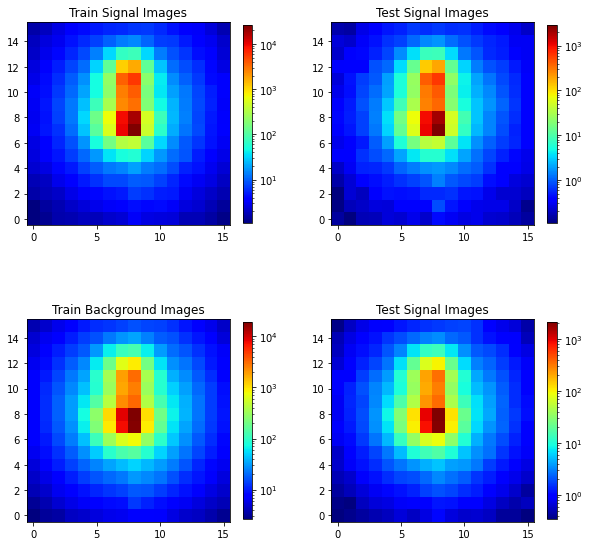

In [13]:
#plot train and test signal
sig_train_images=np.sum(data_train['jetImages'][ind_train_sig],axis=0)
sig_test_images=np.sum(data_test['jetImages'][ind_test_sig],axis=0)
bkg_train_images=np.sum(data_train['jetImages'][ind_train_bkg],axis=0)
bkg_test_images=np.sum(data_test['jetImages'][ind_test_bkg],axis=0)
#Reshape images
sig_train_images = sig_train_images.reshape(grid,grid)
sig_test_images = sig_test_images.reshape(grid,grid)
bkg_train_images = bkg_train_images.reshape(grid,grid)
bkg_test_images = bkg_test_images.reshape(grid,grid)
# Build figure with train and test set 
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(10,10))
im0=ax[0][0].imshow(sig_train_images, interpolation='nearest', origin='low', cmap = 'jet', norm=LogNorm())
ax[0][0].set_title('Train Signal Images')
fig.colorbar(im0, shrink=0.8, ax=ax[0][0])
im1=ax[0][1].imshow(sig_test_images, interpolation='nearest', origin='low', cmap = 'jet', norm=LogNorm())
ax[0][1].set_title('Test Signal Images')
fig.colorbar(im1,shrink=0.8, ax=ax[0][1])
im2=ax[1][0].imshow(bkg_train_images, interpolation='nearest', origin='low', cmap = 'jet', norm=LogNorm())
ax[1][0].set_title('Train Background Images')
fig.colorbar(im2, shrink=0.8, ax=ax[1][0])
im3=ax[1][1].imshow(bkg_test_images, interpolation='nearest', origin='low', cmap = 'jet', norm=LogNorm())
ax[1][1].set_title('Test Signal Images')
fig.colorbar(im3,shrink=0.8, ax=ax[1][1])
#plt.show()
plt.savefig('plots/jet_images.pdf')

### JetImages with permutation

In [64]:
Image_train=np.copy(data_train['jetImages'])
np.random.shuffle(Image_train)
Image_test=np.copy(data_test['jetImages'])
np.random.shuffle(Image_test)

In [65]:
ind_train_sig=np.argwhere(data_train['labels'][:,1]==1)[:,0]
ind_train_bkg=np.argwhere(data_train['labels'][:,0]==1)[:,0]
ind_test_sig=np.argwhere(data_test['labels'][:,1]==1)[:,0]
ind_test_bkg=np.argwhere(data_test['labels'][:,0]==1)[:,0]

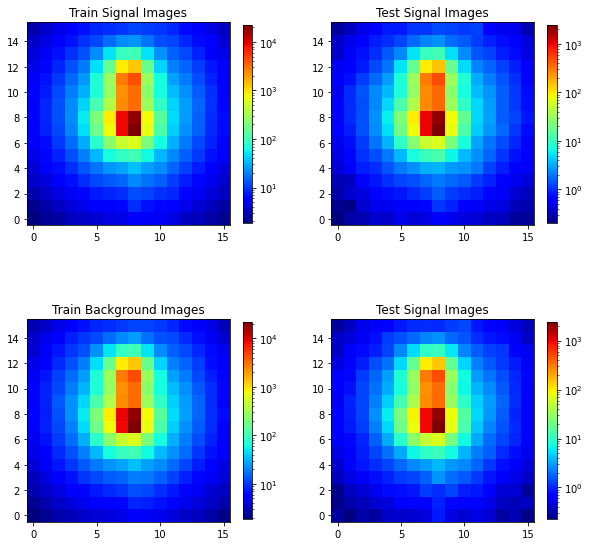

In [67]:
#plot train and test signal
sig_train_images=np.sum(Image_train[ind_train_sig],axis=0)
sig_test_images=np.sum(Image_test[ind_test_sig],axis=0)
bkg_train_images=np.sum(Image_train[ind_train_bkg],axis=0)
bkg_test_images=np.sum(Image_test[ind_test_bkg],axis=0)
#Reshape images
sig_train_images = sig_train_images.reshape(grid,grid)
sig_test_images = sig_test_images.reshape(grid,grid)
bkg_train_images = bkg_train_images.reshape(grid,grid)
bkg_test_images = bkg_test_images.reshape(grid,grid)
# Build figure with train and test set 
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(10,10))
im0=ax[0][0].imshow(sig_train_images, interpolation='nearest', origin='low', cmap = 'jet', norm=LogNorm())
ax[0][0].set_title('Train Signal Images')
fig.colorbar(im0, shrink=0.8, ax=ax[0][0])
im1=ax[0][1].imshow(sig_test_images, interpolation='nearest', origin='low', cmap = 'jet', norm=LogNorm())
ax[0][1].set_title('Test Signal Images')
fig.colorbar(im1,shrink=0.8, ax=ax[0][1])
im2=ax[1][0].imshow(bkg_train_images, interpolation='nearest', origin='low', cmap = 'jet', norm=LogNorm())
ax[1][0].set_title('Train Background Images')
fig.colorbar(im2, shrink=0.8, ax=ax[1][0])
im3=ax[1][1].imshow(bkg_test_images, interpolation='nearest', origin='low', cmap = 'jet', norm=LogNorm())
ax[1][1].set_title('Test Signal Images')
fig.colorbar(im3,shrink=0.8, ax=ax[1][1])
#plt.show()
plt.savefig('plots/jet_images_permuted.pdf')

### jetPt

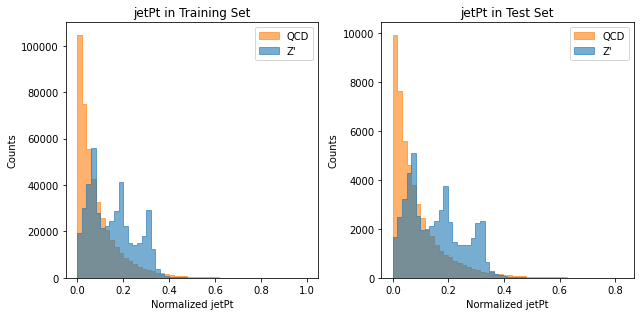

In [14]:
feat='jetPt'
fig, axs = plt.subplots(1, 2, tight_layout=True,figsize=(9,4.5))
# We can set the number of bins with the `bins` kwarg
axs[0].hist([data_train[feat][ind_train_sig],data_train[feat][ind_train_bkg]], bins=50,histtype='step',fill=True,alpha=transp);
axs[0].legend(labels=['QCD',"Z'"]);
axs[0].set_xlabel('Normalized '+feat)
axs[0].set_ylabel('Counts')
axs[0].set_title(feat+' in Training Set');
axs[1].hist([data_test[feat][ind_test_sig],data_test[feat][ind_test_bkg]], bins=50,histtype='step',fill=True,alpha=transp);
axs[1].legend(labels=['QCD',"Z'"]);
axs[1].set_xlabel('Normalized '+feat)
axs[1].set_ylabel('Counts')
axs[1].set_title(feat+' in Test Set');
plt.savefig('plots/'+feat+'.pdf')

### jetEta

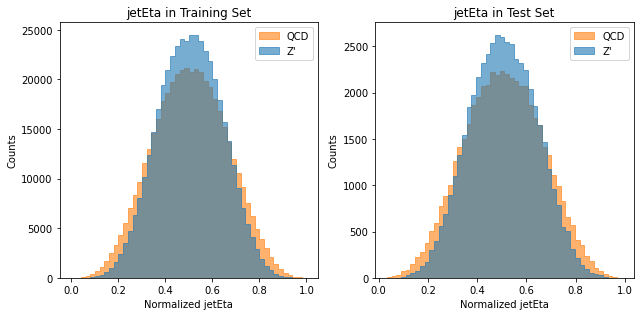

In [15]:
feat='jetEta'
fig, axs = plt.subplots(1, 2, tight_layout=True,figsize=(9,4.5))
# We can set the number of bins with the `bins` kwarg
axs[0].hist([data_train[feat][ind_train_sig],data_train[feat][ind_train_bkg]], bins=50,histtype='step',fill=True,alpha=transp);
axs[0].legend(labels=['QCD',"Z'"]);
axs[0].set_xlabel('Normalized '+feat)
axs[0].set_ylabel('Counts')
axs[0].set_title(feat+' in Training Set');
axs[1].hist([data_test[feat][ind_test_sig],data_test[feat][ind_test_bkg]], bins=50,histtype='step',fill=True,alpha=transp);
axs[1].legend(labels=['QCD',"Z'"]);
axs[1].set_xlabel('Normalized '+feat)
axs[1].set_ylabel('Counts')
axs[1].set_title(feat+' in Test Set');
plt.savefig('plots/'+feat+'.pdf')

### jetPhi

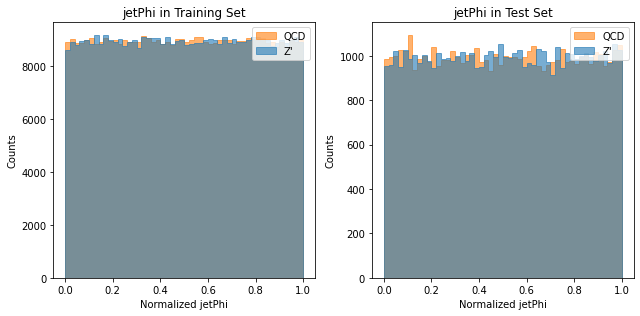

In [16]:
feat='jetPhi'
fig, axs = plt.subplots(1, 2, tight_layout=True,figsize=(9,4.5))
# We can set the number of bins with the `bins` kwarg
axs[0].hist([data_train[feat][ind_train_sig],data_train[feat][ind_train_bkg]], bins=50,histtype='step',fill=True,alpha=transp);
axs[0].legend(labels=['QCD',"Z'"]);
axs[0].set_xlabel('Normalized '+feat)
axs[0].set_ylabel('Counts')
axs[0].set_title(feat+' in Training Set');
axs[1].hist([data_test[feat][ind_test_sig],data_test[feat][ind_test_bkg]], bins=50,histtype='step',fill=True,alpha=transp);
axs[1].legend(labels=['QCD',"Z'"]);
axs[1].set_xlabel('Normalized '+feat)
axs[1].set_ylabel('Counts')
axs[1].set_title(feat+' in Test Set');
plt.savefig('plots/'+feat+'.pdf')

### tau21

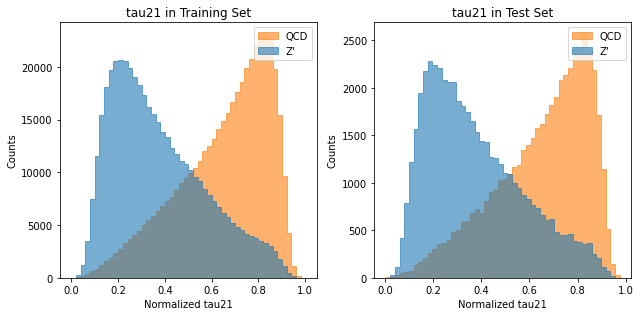

In [17]:
feat='tau21'
fig, axs = plt.subplots(1, 2, tight_layout=True,figsize=(9,4.5))
# We can set the number of bins with the `bins` kwarg
axs[0].hist([data_train[feat][ind_train_sig],data_train[feat][ind_train_bkg]], bins=50,histtype='step',fill=True,alpha=transp);
axs[0].legend(labels=['QCD',"Z'"]);
axs[0].set_xlabel('Normalized '+feat)
axs[0].set_ylabel('Counts')
axs[0].set_title(feat+' in Training Set');
axs[1].hist([data_test[feat][ind_test_sig],data_test[feat][ind_test_bkg]], bins=50,histtype='step',fill=True,alpha=transp);
axs[1].legend(labels=['QCD',"Z'"]);
axs[1].set_xlabel('Normalized '+feat)
axs[1].set_ylabel('Counts')
axs[1].set_title(feat+' in Test Set');
plt.savefig('plots/'+feat+'.pdf')

### chMult

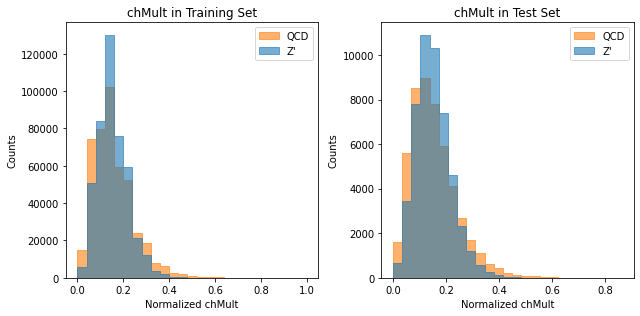

In [18]:
feat='chMult'
fig, axs = plt.subplots(1, 2, tight_layout=True,figsize=(9,4.5))
# We can set the number of bins with the `bins` kwarg
axs[0].hist([data_train[feat][ind_train_sig],data_train[feat][ind_train_bkg]], bins=25,histtype='step',fill=True,alpha=transp);
axs[0].legend(labels=['QCD',"Z'"]);
axs[0].set_xlabel('Normalized '+feat)
axs[0].set_ylabel('Counts')
axs[0].set_title(feat+' in Training Set');
axs[1].hist([data_test[feat][ind_test_sig],data_test[feat][ind_test_bkg]], bins=25,histtype='step',fill=True,alpha=transp);
axs[1].legend(labels=['QCD',"Z'"]);
axs[1].set_xlabel('Normalized '+feat)
axs[1].set_ylabel('Counts')
axs[1].set_title(feat+' in Test Set');
plt.savefig('plots/'+feat+'.pdf')

### neutMult

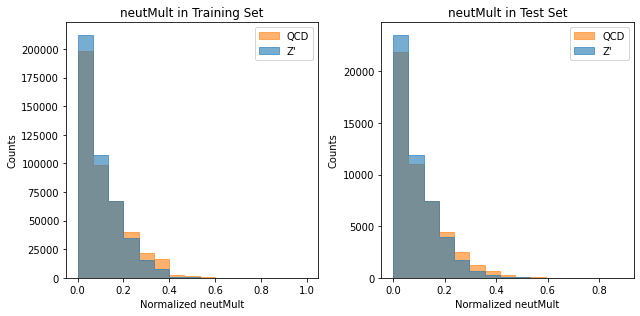

In [19]:
feat='neutMult'
fig, axs = plt.subplots(1, 2, tight_layout=True,figsize=(9,4.5))
# We can set the number of bins with the `bins` kwarg
axs[0].hist([data_train[feat][ind_train_sig],data_train[feat][ind_train_bkg]], bins=15,histtype='step',fill=True,alpha=transp);
axs[0].legend(labels=['QCD',"Z'"]);
axs[0].set_xlabel('Normalized '+feat)
axs[0].set_ylabel('Counts')
axs[0].set_title(feat+' in Training Set');
axs[1].hist([data_test[feat][ind_test_sig],data_test[feat][ind_test_bkg]], bins=15,histtype='step',fill=True,alpha=transp);
axs[1].legend(labels=['QCD',"Z'"]);
axs[1].set_xlabel('Normalized '+feat)
axs[1].set_ylabel('Counts')
axs[1].set_title(feat+' in Test Set');
plt.savefig('plots/'+feat+'.pdf')

### phoMult

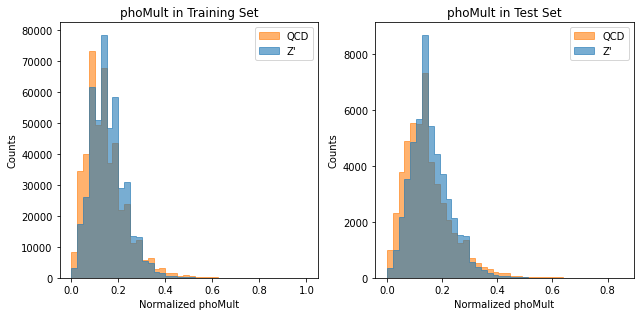

In [20]:
feat='phoMult'
fig, axs = plt.subplots(1, 2, tight_layout=True,figsize=(9,4.5))
# We can set the number of bins with the `bins` kwarg
axs[0].hist([data_train[feat][ind_train_sig],data_train[feat][ind_train_bkg]], bins=40,histtype='step',fill=True,alpha=transp);
axs[0].legend(labels=['QCD',"Z'"]);
axs[0].set_xlabel('Normalized '+feat)
axs[0].set_ylabel('Counts')
axs[0].set_title(feat+' in Training Set');
axs[1].hist([data_test[feat][ind_test_sig],data_test[feat][ind_test_bkg]], bins=40,histtype='step',fill=True,alpha=transp);
axs[1].legend(labels=['QCD',"Z'"]);
axs[1].set_xlabel('Normalized '+feat)
axs[1].set_ylabel('Counts')
axs[1].set_title(feat+' in Test Set');
plt.savefig('plots/'+feat+'.pdf')

### eleMult

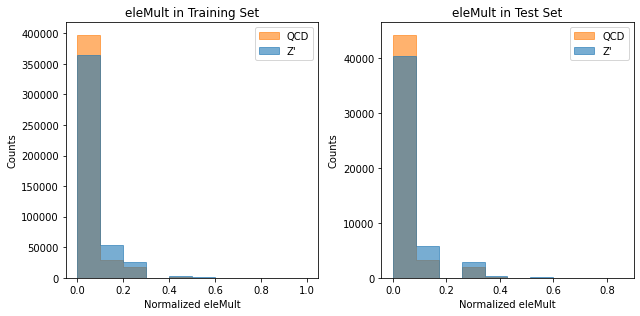

In [21]:
feat='eleMult'
fig, axs = plt.subplots(1, 2, tight_layout=True,figsize=(9,4.5))
# We can set the number of bins with the `bins` kwarg
axs[0].hist([data_train[feat][ind_train_sig],data_train[feat][ind_train_bkg]], bins=10,histtype='step',fill=True,alpha=transp);
axs[0].legend(labels=['QCD',"Z'"]);
axs[0].set_xlabel('Normalized '+feat)
axs[0].set_ylabel('Counts')
axs[0].set_title(feat+' in Training Set');
axs[1].hist([data_test[feat][ind_test_sig],data_test[feat][ind_test_bkg]], bins=10,histtype='step',fill=True,alpha=transp);
axs[1].legend(labels=['QCD',"Z'"]);
axs[1].set_xlabel('Normalized '+feat)
axs[1].set_ylabel('Counts')
axs[1].set_title(feat+' in Test Set');
plt.savefig('plots/'+feat+'.pdf')

### muMult

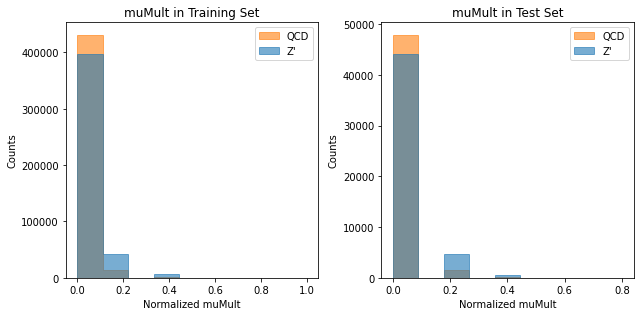

In [22]:
feat='muMult'
fig, axs = plt.subplots(1, 2, tight_layout=True,figsize=(9,4.5))
# We can set the number of bins with the `bins` kwarg
axs[0].hist([data_train[feat][ind_train_sig],data_train[feat][ind_train_bkg]], bins=9,histtype='step',fill=True,alpha=transp);
axs[0].legend(labels=['QCD',"Z'"]);
axs[0].set_xlabel('Normalized '+feat)
axs[0].set_ylabel('Counts')
axs[0].set_title(feat+' in Training Set');
axs[1].hist([data_test[feat][ind_test_sig],data_test[feat][ind_test_bkg]], bins=9,histtype='step',fill=True,alpha=transp);
axs[1].legend(labels=['QCD',"Z'"]);
axs[1].set_xlabel('Normalized '+feat)
axs[1].set_ylabel('Counts')
axs[1].set_title(feat+' in Test Set');
plt.savefig('plots/'+feat+'.pdf')

### jetpull

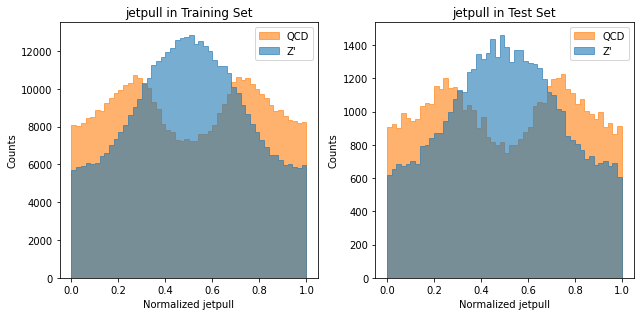

In [23]:
feat='jetpull'
fig, axs = plt.subplots(1, 2, tight_layout=True,figsize=(9,4.5))
# We can set the number of bins with the `bins` kwarg
axs[0].hist([data_train[feat][ind_train_sig],data_train[feat][ind_train_bkg]], bins=50,histtype='step',fill=True,alpha=transp);
axs[0].legend(labels=['QCD',"Z'"]);
axs[0].set_xlabel('Normalized '+feat)
axs[0].set_ylabel('Counts')
axs[0].set_title(feat+' in Training Set');
axs[1].hist([data_test[feat][ind_test_sig],data_test[feat][ind_test_bkg]], bins=50,histtype='step',fill=True,alpha=transp);
axs[1].legend(labels=['QCD',"Z'"]);
axs[1].set_xlabel('Normalized '+feat)
axs[1].set_ylabel('Counts')
axs[1].set_title(feat+' in Test Set');
plt.savefig('plots/'+feat+'.pdf')

### Absolute valure of jetpull

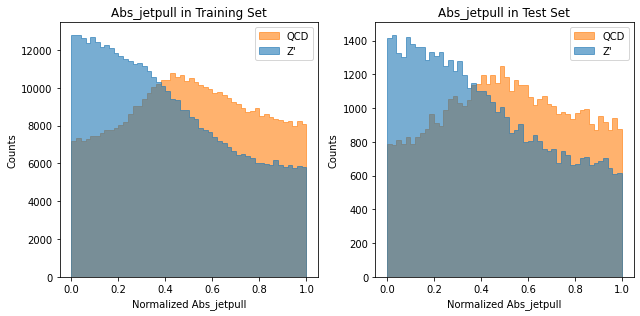

In [59]:
feat='Abs_jetpull'
fig, axs = plt.subplots(1, 2, tight_layout=True,figsize=(9,4.5))
# We can set the number of bins with the `bins` kwarg
axs[0].hist([data_train[feat][ind_train_sig],data_train[feat][ind_train_bkg]], bins=50,histtype='step',fill=True,alpha=transp);
axs[0].legend(labels=['QCD',"Z'"]);
axs[0].set_xlabel('Normalized '+feat)
axs[0].set_ylabel('Counts')
axs[0].set_title(feat+' in Training Set');
axs[1].hist([data_test[feat][ind_test_sig],data_test[feat][ind_test_bkg]], bins=50,histtype='step',fill=True,alpha=transp);
axs[1].legend(labels=['QCD',"Z'"]);
axs[1].set_xlabel('Normalized '+feat)
axs[1].set_ylabel('Counts')
axs[1].set_title(feat+' in Test Set');
plt.savefig('plots/'+feat+'.pdf')

## Save Test and Train Data

In [60]:
np.savez('data/ShowJet_full_train.npz',**data_train)
np.savez('data/ShowJet_full_test.npz',**data_test)